In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randn

%matplotlib inline

# Mobius invariant signatures

We are using the four invariants:
* $J_1 = f_i f_i$
* $J_2 = f_{ii}$

Actually, these two aren't invariants. There's a third thing, called $J_3$ in Robert's notes, and we can get the two conformal invariants by projecting these onto the unit sphere. Attempted in code below, taking spherical polar angles as the invariants. Note use of `nan_to_num` to ignore problems.
* $J_3 = \frac{n \cdot \nabla(\nabla \times n)}{\| \nabla f \|^2}$
* $J_4 = \frac{n \times \nabla(\nabla \cdot n)}{\| \nabla f \|^2}$

Actually, these aren't the invariants. The last two are

In [2]:
def Mobsignature(F, h=1, tol=0):
    """ Compute the Mobius signature components"""
    Fx, Fy = np.gradient(F, h)
    Fxx, Fxy = np.gradient(Fx, h)
    Fyx, Fyy = np.gradient(Fy, h)
    normaliser = np.sqrt(Fx*Fx + Fy*Fy)
    
    # Do the easy ones
    J1 = Fx*Fx + Fy*Fy 
    J2 = Fxx + Fyy
    g = J2 / J1
    gx, gy = np.gradient(g, h)
    
    J3 = np.nan_to_num(J1 * (np.real((gx + 1J*gy)/(Fx + 1J*Fy)))**(1/3))
    
    # Project these onto a sphere
    denom = np.sqrt(J1*J1 + J2*J2 + J3*J3)
    J1t, J2t, J3t = J1/denom, J2/denom, J3/denom
    
    I1 = np.arccos(J3t)
    I2 = np.arctan(J2t / J1t)
    
    # Compute n
    n = 1/normaliser * np.array([Fx,Fy])
    
    # Compute I3
    curl = np.gradient(n[1], h)[0] - np.gradient(n[0], h)[1]
    curl_x, curl_y = np.gradient(curl, h)
    I3 = 1 / J1 * (n[0]*curl_x + n[1]*curl_y)
    
    # Compute I4
    divergence = np.gradient(n[0], h)[0] + np.gradient(n[1], h)[1]
    divergence_x, divergence_y = np.gradient(divergence, h)
    I4 = 1 / J1 * (n[0]*divergence_y - n[1]*divergence_x)

    idx = np.where(Fx*Fx + Fy*Fy < tol)
    I1[idx] = 0
    I2[idx] = 0
    I3[idx] = 0
    I4[idx] = 0
    return F, I1, I2, I3, I4


## Test image
We use as our test function the function `f(x, y)` defined below

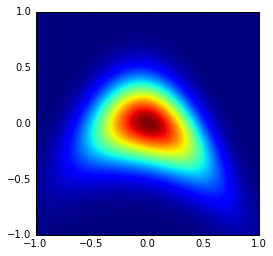

In [3]:
def f(x, y):
    return np.exp(-4*x**2 -8*(y-0.2*x - 0.8*x**2)**2)

h = 1e-3
xmin, xmax = -1, 1
ymin, ymax = -1, 1
x = np.arange(xmin, xmax, h)
y = np.arange(ymin, ymax, h)
X, Y = np.meshgrid(x, y)
F0 = f(X, Y)
plt.imshow(F0, extent=(xmin, xmax, ymin, ymax))

## Transformation
We generate a transformation 


In [4]:
from numpy.random import rand, randn

a = np.complex(0.9,0.1)
b = 0.1
c = np.complex(.1,0.4)
d = 1


The image and its transformation are plotted below


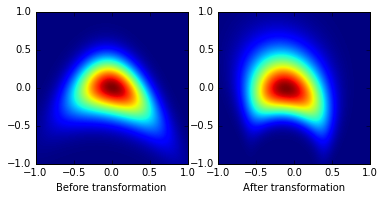

In [5]:
phi = (a*(X+Y*1j) + b)/(c*(X+Y*1j)+d)

F1 = f(np.real(phi),np.imag(phi))

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(F0, extent=(xmin, xmax, ymin, ymax))
axarr[0].set_xlabel('Before transformation')
axarr[1].imshow(F1, extent=(xmin, xmax, ymin, ymax))
axarr[1].set_xlabel('After transformation')

C:\Users\rgbro\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in power


(-1.0, 1.0, -1.0, 1.0)

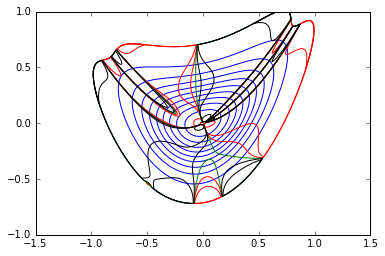

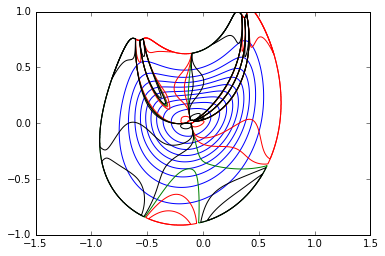

In [6]:
contour_levels = [-100, -1, -0.25, 0, 0.25, 1, 100]
contour_colours = ('red','red','red','green','black','black','black')
plt.figure()
sig0 = Mobsignature(F0, h,0.04)
sig1 = Mobsignature(F1, h,0.04)

plt.figure()
plt.contour(X,Y,F0,levels=np.linspace(.1,.9,9),colors='blue')
plt.contour(X,Y, sig0[3], levels=contour_levels, colors=contour_colours)
plt.axis('equal')

plt.figure()
plt.contour(X,Y,F1,levels=np.linspace(.1,.9,9),colors='blue')
plt.contour(X,Y, sig1[3], levels=contour_levels, colors=contour_colours)
plt.axis('equal')

## Compare signatures of the two images
We compare the signatures for a few contours (with respect to the function value)


[-2, 2, -2, 2]

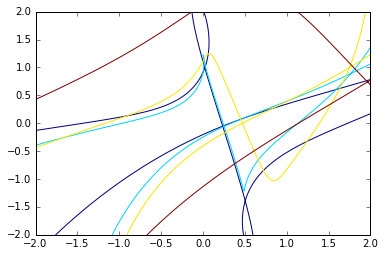

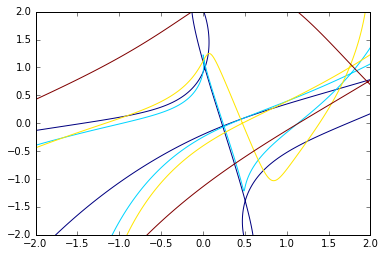

In [7]:
# choose which two signature components: 0 is F, 1 is J1, 2 is J2, etc.

i0 = 3
i1 = 4



contour_levels = (0.2, 0.4, 0.6, 0.8)
plt.figure()
plt.contour(sig0[i0], sig0[i1], sig0[0], levels=contour_levels)
plt.axis([-2,2,-2,2])
plt.figure()
plt.contour(sig1[i0], sig1[i1], sig1[0], levels=contour_levels)
plt.axis([-2,2,-2,2])


The code at the top include a tolerance (tol) that ignores any places where the derivative is LESS THAN that tolerance. So flat places are ignored. This stops the signature blowing up in a simple (tuneable :) ) way. However, it isn't Mobius-invariant. 
One alternative is to effectively repeat the trick of normalising and projecting on the sphere. It has the same problem of multiple directions to approach \infty, and the added bonus of being the 3-sphere. To be done.
Other alternatives? We tried turning the invariants upside-down, it didn't help. Obviously, with hindsight :)


We should make a transformation with lots of scaling in and see how the derivative actually changes, and hence the tolerance goes wrong. To be done!

In [9]:
a = np.complex(12.9,0.0)
b = 0.1
c = np.complex(1.,0.4)
d = 1.